In [0]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt
import os
import time

In [0]:
# Hyperparameters
num_epochs = 15
num_classes = 10
batch_size = 100
learning_rate = 1e-3

In [0]:
def get_data(path, num_workers):
  # CUFAR10 dataset
  # Before using, you should download the dataset to your local repository. Specify 'download' parameter
  # of train_data as True.
  train_data = torchvision.datasets.CIFAR10(root=path, train=True, transform=transforms.ToTensor())
  test_data = torchvision.datasets.CIFAR10(root=path, train=False, transform=transforms.ToTensor())

  train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=2)
  test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False, num_workers=2)
  return train_loader, test_loader

# All classes of images in dataset
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [0]:
train_data, test_data = get_data("data", 2)

In [0]:
# Show the number of images equals to batch_size
def imshow(img):
    img = img / 2 + 0.25
    npimg = img.numpy()
    plt.figure(figsize=(8, 3))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

plane  horse  truck   frog    cat


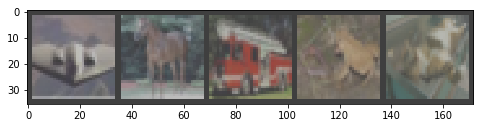

In [62]:
# Checking out the dataset 
dataiter = iter(train_data)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images[:5]))
print("  ".join('%5s' % classes[labels[j]] for j in range(5)))

In [0]:
# Convolutional neural network (CNN), we will use two convolutional layers
class CNN(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()
        
        # Convolutional and pooling layers
        self.cl1 = self.create_layer_block(3, 30)
        self.cl2 = self.create_layer_block(30, 30)
        self.cl3 = self.create_layer_block(30, 30)
        
        # Dropout and fully connected layers
        self.drop_out = nn.Dropout()
        self.fc1 = nn.Linear(8 * 8 * 30, 300)
        self.fc2 = nn.Linear(300, 350)
        self.fc3 = nn.Linear(350, num_classes)
    
    # Creation of layer which consists of convolutional, batchnorming parts and ReLU function
    def create_layer_block(self, in_features, out_features):
        self.layer_block = nn.Sequential(
            nn.Conv2d(in_features, out_features, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(out_features),
            nn.ReLU(),
        )
        return self.layer_block
    
    # Forward pass
    def forward(self, x):
        x = self.cl1(x)
        x = F.max_pool2d(self.cl2(x), 2, 2)
        x = F.relu(self.cl3(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(x.size(0), -1)
        x = self.drop_out(x)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x

In [0]:
model = CNN()

In [0]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
losses = []

# Train our model
def train(model, epochs, learning_rate):
    start = time.time()
    total = len(train_data)
    for epoch in range(epochs):
        for i, (images, labels) in enumerate(train_data):
            images, labels = Variable(images), Variable(labels)
            
            outputs = model(images) # Forward pass
            loss = criterion(outputs, labels)
            losses.append(loss.item())

            optimizer.zero_grad() # Zero gradient value
            loss.backward() # Backward pass
            optimizer.step() # Update our weights
            
            # Visual information
            if (i+1) % 100 == 0:
                print (f"Epoch [{epoch+1}/{epochs}], Step [{i+1}/{total}], Loss: {round(loss.item(), 4)}")
    all_time = round((time.time() - start) / 60, 2)
    print(f"\nTime of training: {all_time} minutes")

In [0]:
# Test our model
def validate_model(model, data):
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in data:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        if len(data) > 100:
          print(f"Accuracy of the model on train data: {round(correct / total * 100, 2)}%")
        elif len(data) == 100:
          print(f"Accuracy of the model on test data: {round(correct / total * 100, 2)}%")

## Training

In [67]:
train(model, num_epochs, learning_rate)

Epoch [1/15], Step [100/500], Loss: 1.6017
Epoch [1/15], Step [200/500], Loss: 1.3238
Epoch [1/15], Step [300/500], Loss: 1.3178
Epoch [1/15], Step [400/500], Loss: 1.2597
Epoch [1/15], Step [500/500], Loss: 0.9774
Epoch [2/15], Step [100/500], Loss: 1.199
Epoch [2/15], Step [200/500], Loss: 1.0439
Epoch [2/15], Step [300/500], Loss: 1.0636
Epoch [2/15], Step [400/500], Loss: 0.9297
Epoch [2/15], Step [500/500], Loss: 1.1475
Epoch [3/15], Step [100/500], Loss: 1.0274
Epoch [3/15], Step [200/500], Loss: 0.9118
Epoch [3/15], Step [300/500], Loss: 0.9634
Epoch [3/15], Step [400/500], Loss: 0.8678
Epoch [3/15], Step [500/500], Loss: 1.162
Epoch [4/15], Step [100/500], Loss: 0.9427
Epoch [4/15], Step [200/500], Loss: 0.8412
Epoch [4/15], Step [300/500], Loss: 0.7534
Epoch [4/15], Step [400/500], Loss: 0.757
Epoch [4/15], Step [500/500], Loss: 0.7651
Epoch [5/15], Step [100/500], Loss: 0.7443
Epoch [5/15], Step [200/500], Loss: 0.7826
Epoch [5/15], Step [300/500], Loss: 0.9616
Epoch [5/15], 

It is always interesting to see how fast the loss is changing its value. Let's check it :)

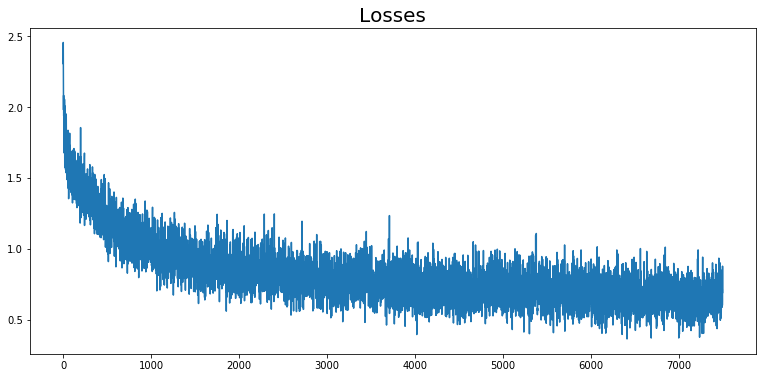

In [68]:
plt.figure(figsize=(13, 6))
plt.plot(losses)
plt.title("Losses", fontsize=20)
plt.show()

## Let's test it!

In [69]:
validate_model(model, train_data)

Accuracy of the model on train data: 81.44%


In [70]:
validate_model(model, test_data)

Accuracy of the model on test data: 75.93%


#### So, accuracy is actually nice, cause difference between train and test datatsets accuracy is pretty small, i.e. model is not overfited. Now, let's try to predict class by image

Actual classes:  bird   car  bird  frog  frog
Predicted classes:  bird   car  bird  frog  frog


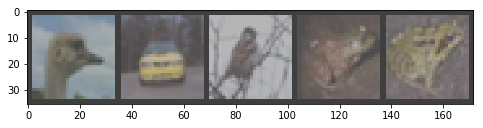

In [71]:
# dataiter = iter(test_data)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images[:5]))

outputs = model(images)
_, predicted = torch.max(outputs.data, 1)
print("Actual classes:", " ".join('%5s' % classes[labels[j]] for j in range(5)))
print("Predicted classes:", " ".join('%5s' % classes[predicted[j]] for j in range(5)))

## After some tests, i can surely say that model performs excellent results.
### The most common case is 4/5 correct answers!

In [0]:
 def save_model(path):
    torch.save(model.state_dict(), path)
    print("Model saved!")